In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
#importing Dataset
data=pd.read_csv("heart.csv")

# Analysing the Data of Heart dataset

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#Checking missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.shape

(303, 14)

In [10]:
#statistical data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


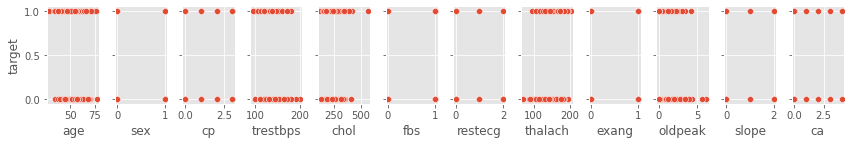

In [76]:
sns.pairplot(data,x_vars=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca'],y_vars='target',height=2,aspect=0.5)

In [ ]:
# In the above figures we can see the squiggle relationships.Hence we have to use the Sigmoid function to predict the heart disease

<AxesSubplot:>

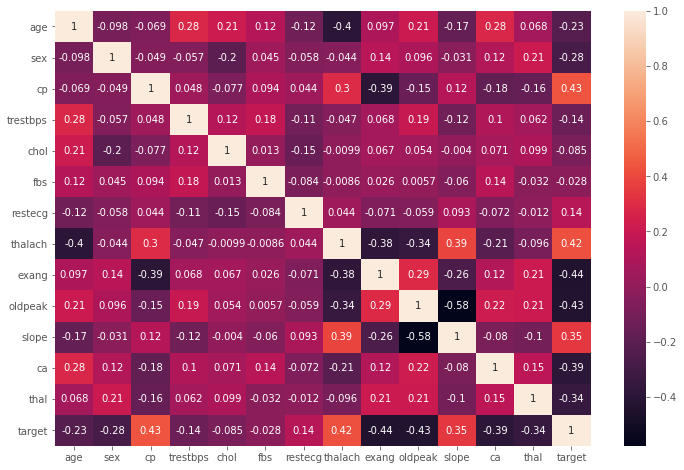

In [77]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
#The above figure represents the Correlations. It is evident that chest Pain has high correlation to the heart disease(target)

#  Splitting the attributes and the target

In [14]:
X= data.drop("target",axis=1)
Y=data["target"]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Splitting Training and Test data

In [49]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=201)

# Model training

In [50]:
model=LogisticRegression()

In [51]:
model.fit(X_train,Y_train)

c:\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#  Model evaluation

In [52]:
#accuracy on training data
XtrainPrediction=model.predict(X_train)
traininDataAccuracy=accuracy_score(XtrainPrediction,Y_train)
print("Accuracy = ",traininDataAccuracy)

Accuracy =  0.8419117647058824


In [53]:
#accuracy on test data
XtestPrediction=model.predict(X_test)
testDataAccuracy=accuracy_score(XtestPrediction,Y_test)
print("Accuracy = ",testDataAccuracy)

Accuracy =  0.8387096774193549


In [ ]:
# As the difference between the Train accuracy and Test accuracy is small, our Model is not biased and Overfitted.

# Building a user-friendly interface to predict whether the patient's heart is fine or has some disease

In [74]:
user_input=(59,1,0,110,239,0,0,142,1,1.2,1,1,3

)
#changing the user_input to numpy array
userInputArray=np.asarray(user_input)
#reshaping the numpy array
userInputReshaped=userInputArray.reshape(1,-1)
prediction=model.predict(userInputReshaped)

if(prediction[0]==1):
  print("This person has a heart disease")
else:
  print("This Person Doesn't have a heart disease")

This Person Doesn't have a heart disease
